In [2]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import seaborn as sns

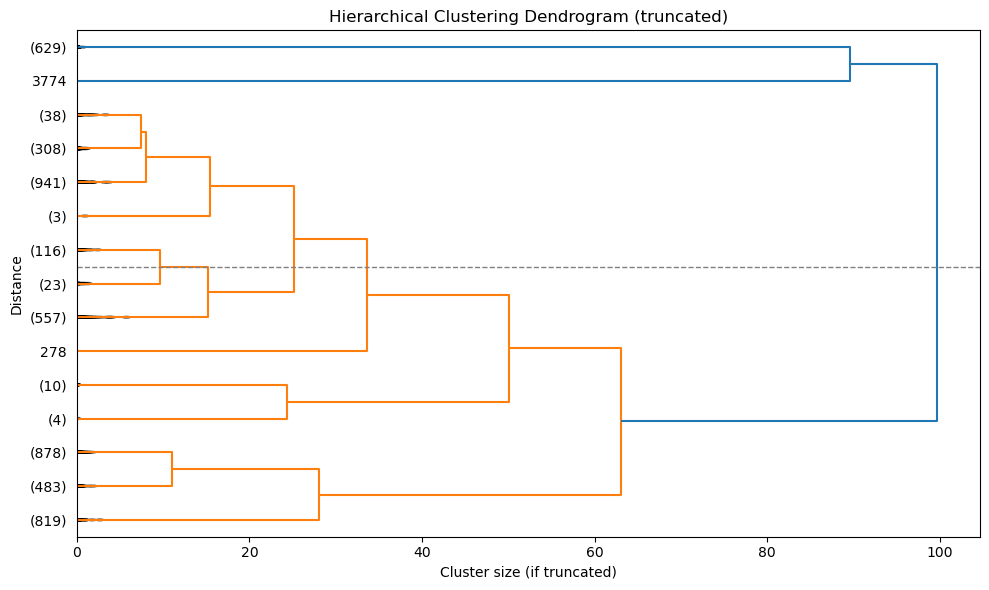

In [3]:
# Load preprocessed features
df_agg = pd.read_csv('fleet_features.csv')

X = df_agg[['speed_mean', 'rpm_mean', 'acceleration_mean']].values

Z = linkage(X, method='ward')

distance_cut = 80  # adjust to your data

plt.figure(figsize=(10, 6))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Cluster size (if truncated)')
plt.ylabel('Distance')

dendrogram(
    Z,
    truncate_mode='lastp',   # condense the tree
    p=15,                    # show only the last 15 merged clusters
    orientation='right',     # horizontal tree for readability
    show_leaf_counts=True,   # show counts for truncated leaves
    color_threshold=distance_cut,
    leaf_rotation=0,
    leaf_font_size=10,
    show_contracted=True     # show dots for hidden merges
)

# draw the cut line
plt.axhline(y=distance_cut, color='grey', lw=1, ls='--')
plt.tight_layout()
plt.show()



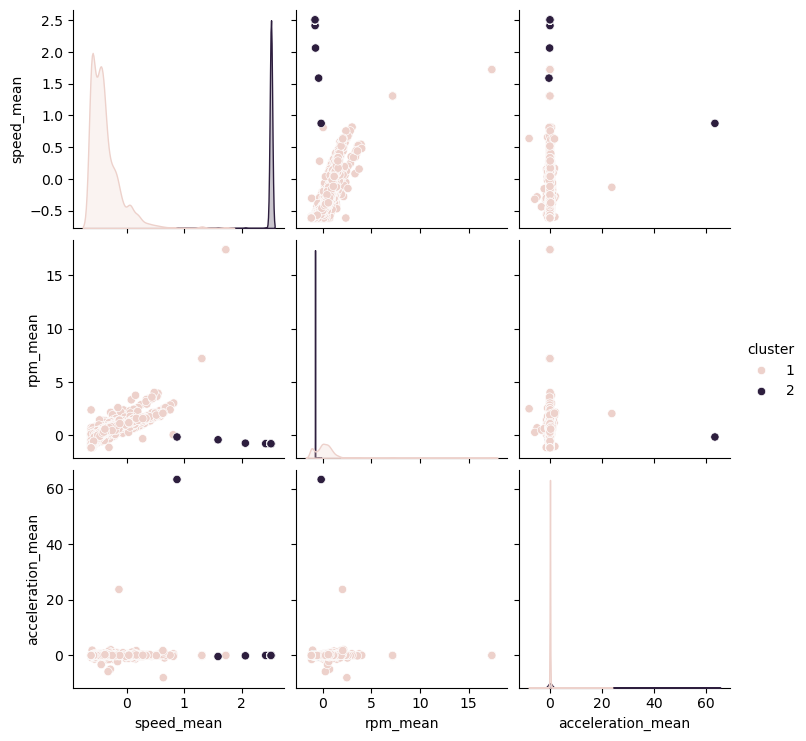

In [4]:
k = 2  # choose appropriate cluster count
clusters = fcluster(Z, k, criterion='maxclust')

df_agg['cluster'] = clusters

sns.pairplot(df_agg, hue='cluster', vars=['speed_mean', 'rpm_mean', 'acceleration_mean'])
plt.show()

In [5]:
df_agg.to_csv('clustered_features.csv', index=False)